Our initial measure of error is pretty high:  54.76484150983305
Found a way to lower the error to:  50.49046541550897
Found a way to lower the error to:  40.45762054721229
Found a way to lower the error to:  35.4143547242043
Found a way to lower the error to:  34.7589145531905
Found a way to lower the error to:  34.149748437046114
Found a way to lower the error to:  33.58885448013974
Found a way to lower the error to:  33.07816616283167
Found a way to lower the error to:  32.61953672326395
Found a way to lower the error to:  32.21472397315151
Found a way to lower the error to:  31.865375771483453
Found a way to lower the error to:  31.752499593060868
Found a way to lower the error to:  31.573016355770942
Found a way to lower the error to:  30.765585695392666
Found a way to lower the error to:  29.807840331289206
Found a way to lower the error to:  28.881602748488795
Found a way to lower the error to:  27.98932831578225
Found a way to lower the error to:  27.133580881588
Found a way to 

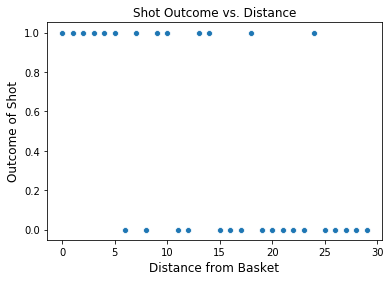

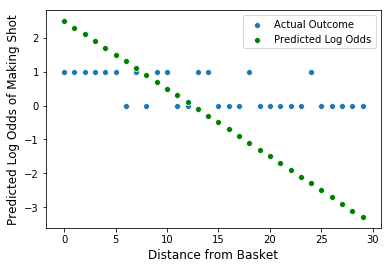

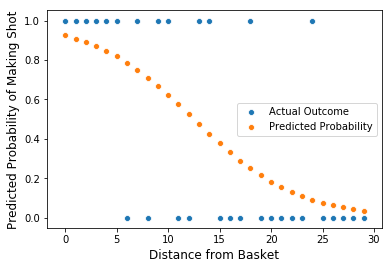

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dumb Logit Regression (no gradient descent so it optimizes itself very slowly)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

# My data (makes and misses vs. distance like in the lecture)
makes = [1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0]    # <- if you made the shot then this is 1
distance = [i for i in range(30)]

df = pd.DataFrame()
df['y'] = makes
df['x'] = distance

# initial guess of parameter values
b0 = 0.2
b1 = -0.5

# function for getting probability predictions given a beta0 and beta1
def get_predictions(b0, b1):
    predictions = []
    raw_predictions= []
    for i in distance:
        predictions.append(sigmoid(b0 + b1*i))    # <- notice that after you predict, you end up with log odds
                                                  #    so you need to put the output in a sigmoid function
                                                  #    to convert to probabilities
        raw_predictions.append(b0 + b1*i)
    return predictions, raw_predictions
    
# function to compute the cost function <- we need to minimize this cost function to fit the logit
def compute_cost(predictions):
    costs = []
    for i, val in enumerate(makes):
        if val == 1:
            costs.append(-np.log(predictions[i])) # notice the error is computed differently depending on y (makes)
        else:
            costs.append(-np.log(1-predictions[i]))
    # the sum of costs is the model's current error
    cost = sum(costs)
    return cost, costs

# now we need to minimize cost (in reality this is done with gradient descent but I brute forced it)
# let's look at how we did with our first guess
pred1, pred1_raw = get_predictions(b0, b1)
cost1, costs1 = compute_cost(pred1)
print('Our initial measure of error is pretty high: ', cost1)

# let's loop through a bunch of beta0s and beta1s to try to lower the cost
lowest_cost = cost1
best_params = [b0, b1]
for i in range(-30, 31):
    b0_guess = i/10
    for j in range(-10,11):
        b1_guess = j/10
        new_pred, raw_pred = get_predictions(b0_guess, b1_guess)
        new_cost, cost_list = compute_cost(new_pred)
        if new_cost < lowest_cost:
            lowest_cost = new_cost
            print('Found a way to lower the error to: ', new_cost)
            best_params = [b0_guess, b1_guess]

print('\nMy estimate for Beta0: ', best_params[0])
print('My estimate for Beta1: ', best_params[1])

# throw my predictions and actuals into a df for plotting
df_final = pd.DataFrame()
predictions, raw_predictions = get_predictions(best_params[0], best_params[1])
df_final['prediction'] = predictions
df_final['prediction_raw'] = raw_predictions
df_final['actual'] = makes
df_final['distance'] = distance

# scatter of just outcome (makes) and x variable (distances)
ax = sns.scatterplot(x='distance', y='actual', data=df_final)
ax.set_xlabel("Distance from Basket",fontsize=12)
ax.set_ylabel("Outcome of Shot",fontsize=12)
plt.title('Shot Outcome vs. Distance')
plt.savefig(fname='bball_scatter1', dpi=150)
plt.show()

# scatter with log odds and predicted probability
sns.scatterplot(x='distance', y='actual', data=df_final)
ax = sns.scatterplot(x='distance', y='prediction_raw', data=df_final, color='g')
ax.set_xlabel("Distance from Basket",fontsize=12)
ax.set_ylabel("Predicted Log Odds of Making Shot",fontsize=12)
plt.legend(labels=['Actual Outcome', 'Predicted Log Odds'])
plt.savefig(fname='bball_scatter2', dpi=150)
plt.show()

# scatter with predicted probability
sns.scatterplot(x='distance', y='actual', data=df_final)
ax = sns.scatterplot(x='distance', y='prediction', data=df_final)
ax.set_xlabel("Distance from Basket",fontsize=12)
ax.set_ylabel("Predicted Probability of Making Shot",fontsize=12)
plt.legend(labels=['Actual Outcome', 'Predicted Probability'])
plt.savefig(fname='bball_scatter3', dpi=150)
plt.show()

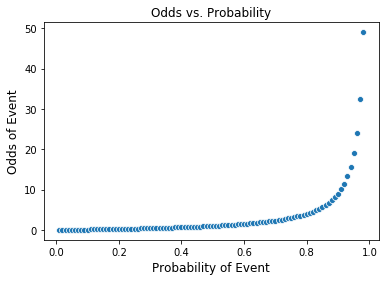

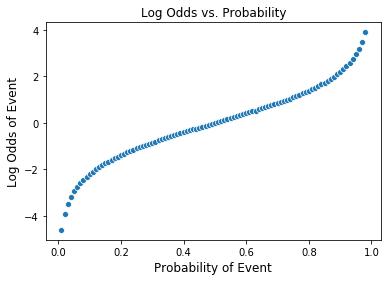

In [3]:
prob = [i/100 for i in range(1,99)]
odds = [i/(1-i) for i in prob]
log_odds = [np.log(i) for i in odds]

odds_df = pd.DataFrame()
odds_df['prob'] = prob
odds_df['odds'] = odds
odds_df['log_odds'] = log_odds

ax = sns.scatterplot(x='prob', y='odds', data=odds_df)
ax.set_xlabel("Probability of Event",fontsize=12)
ax.set_ylabel("Odds of Event",fontsize=12)
plt.title('Odds vs. Probability')
plt.savefig(fname='odds_scatter1', dpi=150)
plt.show()

ax = sns.scatterplot(x='prob', y='log_odds', data=odds_df)
ax.set_xlabel("Probability of Event",fontsize=12)
ax.set_ylabel("Log Odds of Event",fontsize=12)
plt.title('Log Odds vs. Probability')
plt.savefig(fname='odds_scatter2', dpi=150)
plt.show()

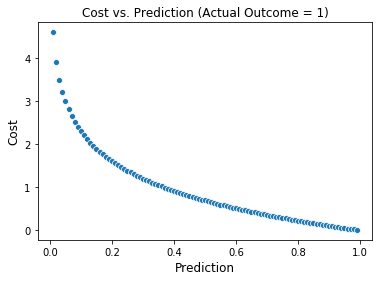

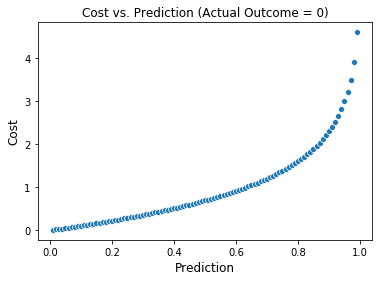

In [4]:
cost_1 = []
cost_0 = []
for i in range(1,100):
    cost_1.append(-np.log(i/100))
    cost_0.append(-np.log(1-i/100))
cost_df = pd.DataFrame()
cost_df['cost_1'] = cost_1
cost_df['cost_0'] = cost_0
cost_df['pred'] = [i/100 for i in range(1,100)]

ax = sns.scatterplot(x='pred', y='cost_1', data=cost_df)
ax.set_xlabel("Prediction",fontsize=12)
ax.set_ylabel("Cost",fontsize=12)
plt.title('Cost vs. Prediction (Actual Outcome = 1)')
plt.savefig(fname='cost_scatter1', dpi=150)
plt.show()

ax = sns.scatterplot(x='pred', y='cost_0', data=cost_df)
ax.set_xlabel("Prediction",fontsize=12)
ax.set_ylabel("Cost",fontsize=12)
plt.title('Cost vs. Prediction (Actual Outcome = 0)')
plt.savefig(fname='cost_scatter0', dpi=150)
plt.show()